In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
df.rename(columns={'whether he/she donated blood in March 2007':'Class'},inplace=True)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
df.shape

(748, 5)

In [7]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Class                  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [9]:
monetary=df['Monetary (c.c. blood)']
monetary.describe()

count      748.000000
mean      1378.676471
std       1459.826781
min        250.000000
25%        500.000000
50%       1000.000000
75%       1750.000000
max      12500.000000
Name: Monetary (c.c. blood), dtype: float64

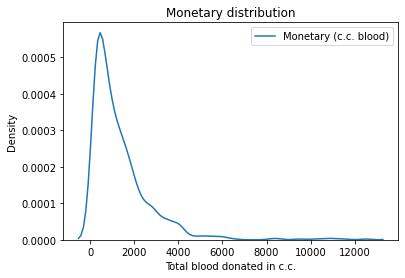

In [12]:
sns.kdeplot(monetary)
plt.xlabel('Total blood donated in c.c.')
plt.ylabel('Density')
plt.title('Monetary distribution')
plt.show()

In [14]:
df['Class'].value_counts()

0    570
1    178
Name: Class, dtype: int64

In [15]:
from sklearn.utils import resample

In [16]:
class_majority=df[df.Class==0]
class_minority=df[df.Class==1]

In [17]:
class_minority_upsampled=resample(class_minority,replace=True,n_samples=570,random_state=123)
df_upsampled=pd.concat([class_majority,class_minority_upsampled])
df_upsampled.Class.value_counts()

1    570
0    570
Name: Class, dtype: int64

In [18]:
class_majority_downsampled=resample(class_majority,replace=True,n_samples=178,random_state=123)
df_downsampled=pd.concat([class_majority_downsampled,class_minority])
df_downsampled.Class.value_counts()

1    178
0    178
Name: Class, dtype: int64

In [21]:
def visualize_classes(x):
    labels,counts=np.unique(x['Class'],return_counts=True)
    plt.bar(labels,counts,color=['r','b'])
    plt.gca().set_xticks(labels)
    plt.xlabel('Labels',fontsize=20)
    plt.ylabel('Counts',fontsize=20)
    plt.title('Class distribution',fontsize=25)
    plt.show()

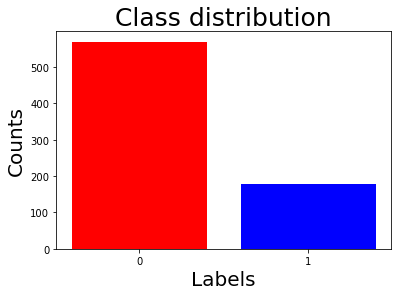

In [22]:
visualize_classes(df)

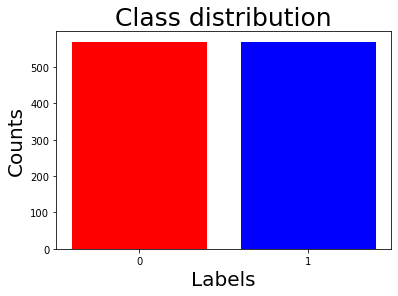

In [23]:
visualize_classes(df_upsampled)

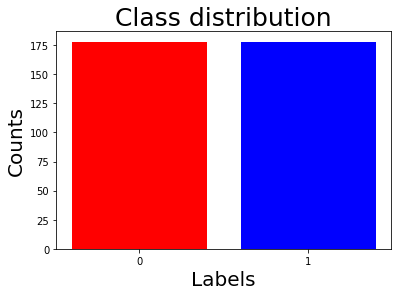

In [24]:
visualize_classes(df_downsampled)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA().fit(df)

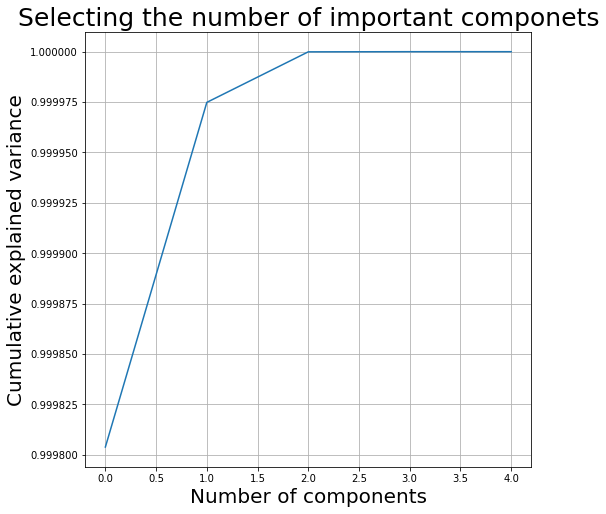

In [28]:
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Cumulative explained variance',fontsize=20)
plt.title('Selecting the number of important componets',fontsize=25)
plt.grid()
plt.show()

In [29]:
X=df_upsampled.drop('Class',1)
y=df_upsampled['Class']

In [30]:
X=X/X.sum()
X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
4,0.000108,0.003278,0.003278,0.001984
5,0.000431,0.000546,0.000546,0.000103
7,0.000108,0.001639,0.001639,0.000902
10,0.000431,0.003142,0.003142,0.001495
11,0.000000,0.000410,0.000410,0.000103


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123,stratify=y)

In [32]:
X_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
652,0.001508,0.000546,0.000546,0.000670
33,0.000431,0.001229,0.001229,0.000670
119,0.000215,0.001503,0.001503,0.002036
260,0.000431,0.000546,0.000546,0.001056
158,0.000215,0.000137,0.000137,0.000052


In [33]:
X_test.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
196,0.000969,0.001093,0.001093,0.000979
318,0.001185,0.001229,0.001229,0.001855
410,0.001723,0.000137,0.000137,0.000412
327,0.001508,0.002185,0.002185,0.002525
560,0.000431,0.001503,0.001503,0.001649


In [34]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score

C:\Users\ASUS\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [35]:
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='accuracy',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)

In [36]:
tpot.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.783625730994152

Generation 2 - Current best internal CV score: 0.7871345029239766

Generation 3 - Current best internal CV score: 0.7894736842105263

Generation 4 - Current best internal CV score: 0.7894736842105263

Generation 5 - Current best internal CV score: 0.7929824561403509

Best pipeline: KNeighborsClassifier(PCA(MinMaxScaler(RobustScaler(input_matrix)), iterated_power=4, svd_solver=randomized), n_neighbors=92, p=2, weights=distance)


TPOTClassifier(config_dict='TPOT light', disable_update_check=True,
               generations=5, population_size=20, random_state=42,
               scoring='accuracy', verbosity=2)

In [37]:
accuracy_score(y_test,tpot.predict(X_test))

0.8

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier(n_neighbors=92,p=2,weights='distance')

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=92, weights='distance')

In [43]:
accuracy_score(y_test,knn.predict(X_test))

0.8140350877192982

In [44]:
import pickle

In [45]:
pickle.dump(knn,open('model.pkl','wb'))

In [46]:
model=pickle.load(open('model.pkl','rb'))
print(model.predict([[2, 50, 12500, 98]]))

[1]


In [48]:
model.predict([[0, 0, 0, 0]])

array([1], dtype=int64)

In [49]:
from sklearn.metrics import plot_confusion_matrix

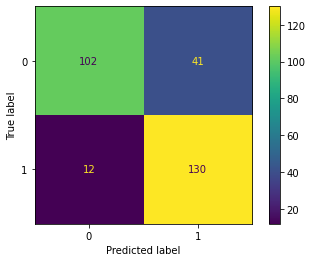

In [50]:
plot_confusion_matrix(knn,X_test,y_test)

In [52]:
knn.predict([[0,0,0,0]])

array([1], dtype=int64)